## 데이터 기본
### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
- target : 자동차 가격
### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
### 3. sample_submission.csv : 제출 양식
- id : 샘플 아이디
- target : 자동차 가격

## 데이터 불러오기 및 기본 정보

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample_submission=pd.read_csv('./data/sample_submission.csv')
test=pd.read_csv('./data/test.csv')
train=pd.read_csv('./data/train.csv')

In [4]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [5]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000


In [7]:
df_list=[train, test]
for i in df_list:
    print('---shape---')
    print(i.shape)
    print()
    print('---null---')
    print(i.isnull().sum())
    print('---null---')
    print(i.info())
    print('-' * 50)

---shape---
(1015, 11)

---null---
id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
target          0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB
None
----------------------------------

In [8]:
for i in df_list:
    print('-' * 22)
    print(sum(i.duplicated()))
    print()

----------------------
0

----------------------
0



## 타겟변수 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

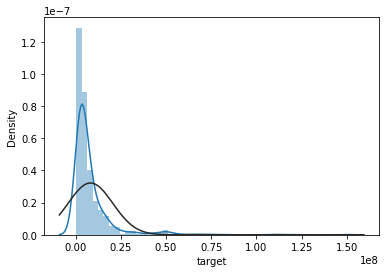

In [10]:
target=train['target']

from scipy import stats
from scipy.stats import norm

sns.distplot(train['target'], fit=norm)

((array([-3.2018795 , -2.93699643, -2.78920173, ...,  2.78920173,
          2.93699643,  3.2018795 ]),
  array([   400000,    400000,    400000, ..., 110015000, 117015000,
         150015008], dtype=int64)),
 (8938213.431636602, 8243204.450246304, 0.7194519736543091))

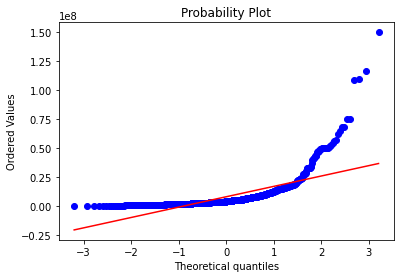

In [11]:
stats.probplot(train['target'],plot=plt)

#왼쪽으로 치우쳐저 있기에 log나 root로 변환해보려한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logTarget', ylabel='Density'>

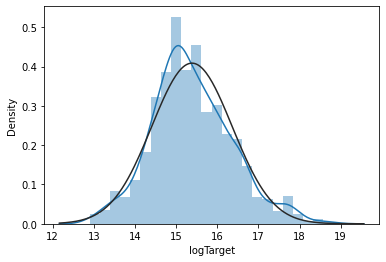

In [12]:
train['logTarget']=np.log(target+1)

sns.distplot(train['logTarget'], fit=norm)

((array([-3.2018795 , -2.93699643, -2.78920173, ...,  2.78920173,
          2.93699643,  3.2018795 ]),
  array([12.89922233, 12.89922233, 12.89922233, ..., 18.51612729,
         18.5778127 , 18.82624591])),
 (0.9735853760948998, 15.385252309424105, 0.9942432431601682))

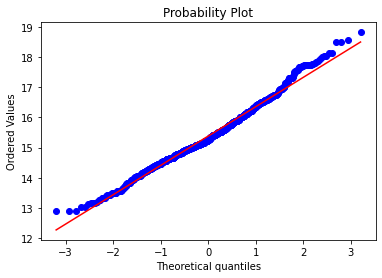

In [13]:
stats.probplot(train['logTarget'],plot=plt)